In [1]:
import tensorflow as tf
import tensorflow_datasets.public_api as tfds
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = tfds.load('cats_vs_dogs', split='train',as_supervised=True)

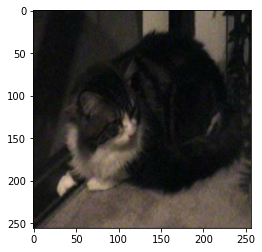

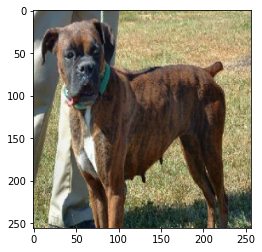

In [4]:
train_imgs = np.zeros((2000,256,256,3))
train_labels = np.zeros((2000,1))
test_imgs = np.zeros((300,256,256,3))
test_labels = np.zeros((300,1))
i = 0
for img, label in dataset:
  img = cv2.resize(img.numpy(),(256,256))
  if i < 2000:
    train_imgs[i] = img
    train_labels[i] = label
  elif (i > 1999) & (i < 2300):
    test_imgs[i-2000] = img
    test_labels[i-2000] = label
  else:
    break
  i = i + 1
plt.imshow(train_imgs[-1]/255)
plt.show()
plt.imshow(train_imgs[0]/255)
plt.show()
train_imgs = train_imgs/255
test_imgs = test_imgs/255

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 batch_normalization_8 (Batc  (None, 256, 256, 8)      32        
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 8)       584       
                                                                 
 batch_normalization_9 (Batc  (None, 254, 254, 8)      32        
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 16)      1168      
                                                                 
 dropout_1 (Dropout)         (None, 252, 252, 16)     

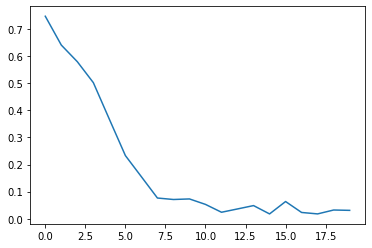

In [9]:
def build_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(8,3,padding='same',activation='relu',input_shape=(256,256,3)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(8,3,activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(16,3,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Conv2D(16,3,activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D((3,3)))
  model.add(tf.keras.layers.Conv2D(32,3,activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D((3,3)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(64,activation='relu'))
  model.add(tf.keras.layers.Dense(8,activation='relu'))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  return model

model = build_model()
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_imgs,train_labels,epochs=20,batch_size=32)
plt.plot(history.history['loss'])
plt.show()


10/10 [==============================] - 1s 76ms/step - loss: 1.7002 - accuracy: 0.7100
testing accuracy 0.7099999785423279


<function matplotlib.pyplot.show>

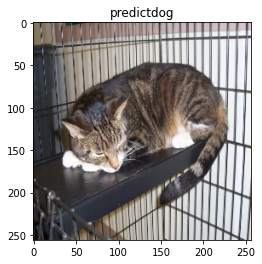

In [10]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('testing accuracy', test_acc)
prediction = model.predict(test_imgs)
pdt_label = 'dog' if prediction[0] else 'cat'
plt.imshow(test_imgs[0])
plt.title('predict' + pdt_label)
plt.show